In [ ]:
!pip install --upgrade pandas numpy scikit-learn joblib matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import pandas as pd

#Loading the uploaded dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Shape:", df.shape)
print(df.columns.tolist())
df.head()


Shape: (7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Dropping customerID
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

#Turning blank strings into NaN
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

#Checking for missing values
print(df.isna().sum())
df.head()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
#Features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (7043, 19)
Target shape: (7043,)


In [ ]:
#Numerical features
num_features = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]

num_features = [col for col in num_features if col in X.columns]

#Categorical features
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", num_features)
print("Categorical features:", cat_features)


Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Numerical pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

#Categorical pipeline
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])


In [ ]:
#Checking duplicate values
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

df = df.drop_duplicates()
print("Duplicates after removal:", df.duplicated().sum())


Number of duplicate rows: 22
Duplicates after removal: 0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#Defining feature lists
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

#Preprocessing with Imputation + Scaling/Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), numeric_features),

        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_features)
    ]
)



In [ ]:
from sklearn.model_selection import train_test_split

#Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (5634, 19) (5634,)
Test shape: (1409, 19) (1409,)


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

#Building pipeline
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver='liblinear'))
])

log_reg_pipeline.fit(X_train, y_train)

#Evaluate on test
y_pred = log_reg_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, log_reg_pipeline.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8055358410220014
ROC AUC: 0.8418998165801235

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Defining parameter grid for Logistic Regression
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["liblinear"]  # supports l1 and l2
}

#pipeline
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

#GridSearch with 10-fold CV
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    cv=10,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

#Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

#Evaluate on test
y_pred = grid_search.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best CV Accuracy: 0.8052826171850397

Test Accuracy: 0.8005677785663591
Test ROC AUC: 0.8406701283939135

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



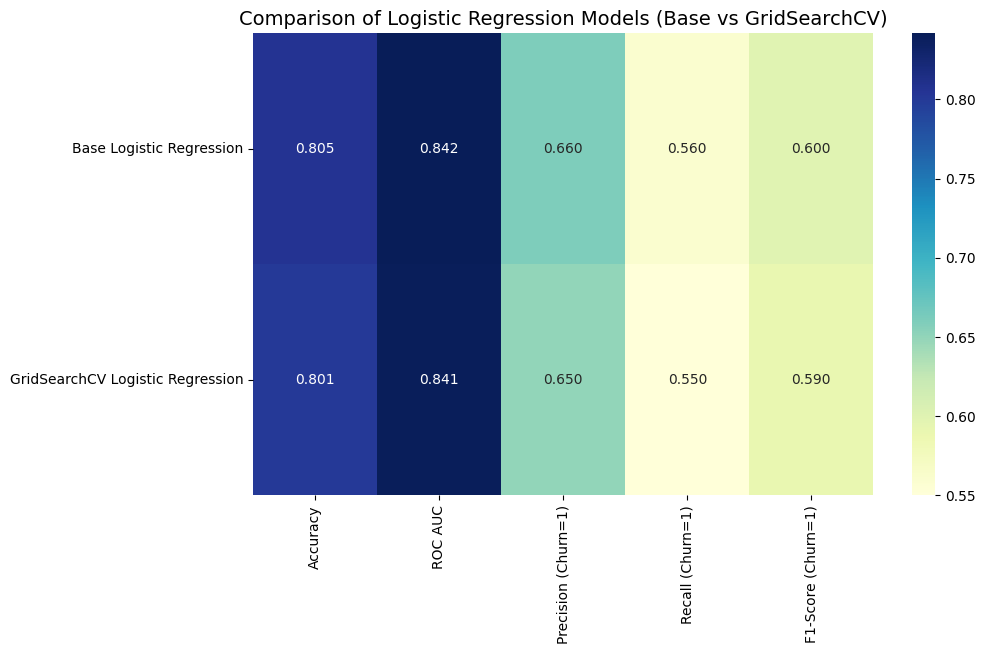

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Results from both models
results = {
    "Base Logistic Regression": {
        "Accuracy": 0.8055,
        "ROC AUC": 0.8419,
        "Precision (Churn=1)": 0.66,
        "Recall (Churn=1)": 0.56,
        "F1-Score (Churn=1)": 0.60
    },
    "GridSearchCV Logistic Regression": {
        "Accuracy": 0.8006,
        "ROC AUC": 0.8407,
        "Precision (Churn=1)": 0.65,
        "Recall (Churn=1)": 0.55,
        "F1-Score (Churn=1)": 0.59
    }
}

df_results = pd.DataFrame(results).T

#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_results, annot=True, cmap="YlGnBu", fmt=".3f", cbar=True)
plt.title("Comparison of Logistic Regression Models (Base vs GridSearchCV)", fontsize=14)
plt.yticks(rotation=0)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

#Building pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train)

#Evaluate on test
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7849538679914834
Random Forest ROC AUC: 0.8200328089074891

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

#Random Forest pipeline with preprocessing
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

#Parameter grid for GridSearch
param_grid_rf = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2],
    "classifier__max_features": ["sqrt", "log2"]
}

#GridSearchCV with 5-fold CV
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

#Best parameters and CV score
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best CV Accuracy:", grid_search_rf.best_score_)

#Evaluation
y_pred_rf = grid_search_rf.predict(X_test)
y_pred_proba_rf = grid_search_rf.predict_proba(X_test)[:, 1]

print("\nTuned Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Tuned Random Forest Test ROC AUC:", roc_auc_score(y_test, y_pred_proba_rf))
print("\nClassification Report (Tuned RF):\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters (Random Forest): {'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best CV Accuracy: 0.8024477502793534

Tuned Random Forest Test Accuracy: 0.8019872249822569
Tuned Random Forest Test ROC AUC: 0.8375894494820326

Classification Report (Tuned RF):
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



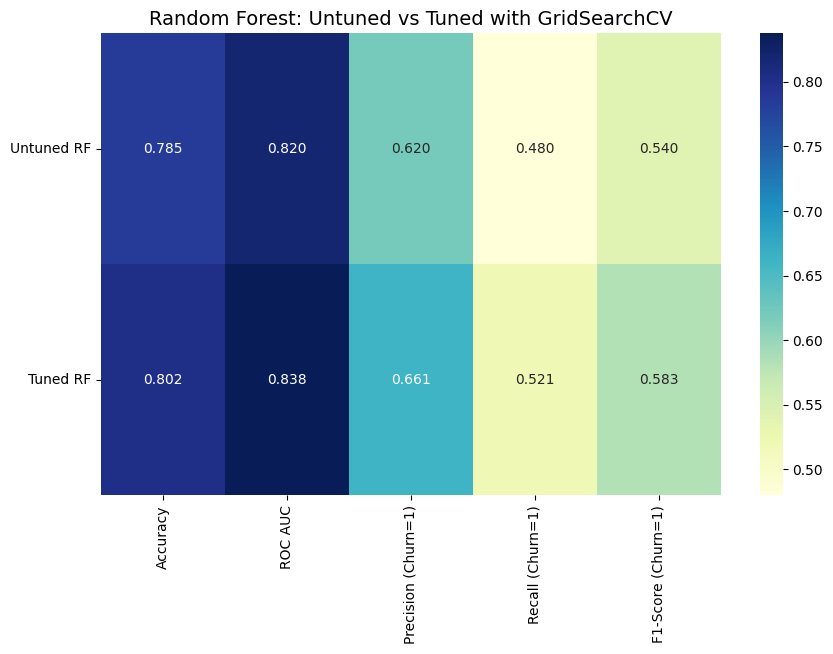

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

#Untuned Random Forest results
untuned_rf_results = {
    "Accuracy": 0.78495,
    "ROC AUC": 0.82003,
    "Precision (Churn=1)": 0.62,
    "Recall (Churn=1)": 0.48,
    "F1-Score (Churn=1)": 0.54
}

#Tuned Random Forest results from GridSearchCV
tuned_rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

tuned_rf_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba_rf),
    "Precision (Churn=1)": tuned_rf_report['1']['precision'],
    "Recall (Churn=1)": tuned_rf_report['1']['recall'],
    "F1-Score (Churn=1)": tuned_rf_report['1']['f1-score']
}

comparison_df = pd.DataFrame([untuned_rf_results, tuned_rf_results],
                             index=["Untuned RF", "Tuned RF"])

#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(comparison_df, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Random Forest: Untuned vs Tuned with GridSearchCV", fontsize=14)
plt.yticks(rotation=0)
plt.show()


In [ ]:
import joblib

#Exporting Logistic Regression pipeline
joblib.dump(grid_search, "logistic_regression_pipeline.pkl")
print("Logistic Regression pipeline saved as 'logistic_regression_pipeline.pkl'")

#Exporting Random Forest pipeline
joblib.dump(grid_search_rf, "random_forest_pipeline.pkl")
print("Random Forest pipeline saved as 'random_forest_pipeline.pkl'")


Logistic Regression pipeline saved as 'logistic_regression_pipeline.pkl'
Random Forest pipeline saved as 'random_forest_pipeline.pkl'
